# Task 5. Matrix multiplication (matmul)

* Launch all cells of the task, write down (in this markdown) the time ratio (according to cProfile results) between computational times (expended on matmuls based on loops and numpy) explain why cProfile gives faster the same results for numpy code than for loop code.

## Import libraries

In [1]:
import cProfile
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/alexh3/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def matmul(A, B):    
    C = [[0 for row in range(len(A))] for col in range(len(B[0]))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k]*B[k][j]
    return C


def prepare_A_B(n, m):
    A = np.arange(n * m).reshape(n, m)
    B = 0.1 * A[::-1].T
    return A, B


def repeat_loops(m = 100):
    for n in range(10, 50):
        A, B = prepare_A_B(n, m)
        matmul(A, B)

        
def repeat_numpy(m = 100):    
    for n in range(10, 50):
        A, B = prepare_A_B(n, m)
        np.dot(A, B)

In [3]:
m_given = 100

cProfile.run('repeat_loops(m = ' + str(m_given) + ')' )

         42784 function calls in 10.676 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       40   10.669    0.267   10.674    0.267 <ipython-input-2-8356d9972875>:1(matmul)
       40    0.001    0.000    0.001    0.000 <ipython-input-2-8356d9972875>:10(prepare_A_B)
        1    0.002    0.002   10.677   10.677 <ipython-input-2-8356d9972875>:16(repeat_loops)
       40    0.001    0.000    0.002    0.000 <ipython-input-2-8356d9972875>:2(<listcomp>)
        1    0.000    0.000   10.677   10.677 <string>:1(<module>)
        1    0.000    0.000   10.677   10.677 {built-in method builtins.exec}
    42580    0.003    0.000    0.003    0.000 {built-in method builtins.len}
       40    0.000    0.000    0.000    0.000 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       40    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndarray' objects

####    42784 function calls in 8.318 seconds

In [4]:
cProfile.run('repeat_numpy(m = ' + str(m_given) + ')' )

         244 function calls in 0.024 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       40    0.000    0.000    0.023    0.001 <__array_function__ internals>:2(dot)
       40    0.001    0.000    0.001    0.000 <ipython-input-2-8356d9972875>:10(prepare_A_B)
        1    0.000    0.000    0.024    0.024 <ipython-input-2-8356d9972875>:22(repeat_numpy)
        1    0.000    0.000    0.024    0.024 <string>:1(<module>)
       40    0.000    0.000    0.000    0.000 multiarray.py:707(dot)
        1    0.000    0.000    0.024    0.024 {built-in method builtins.exec}
       40    0.000    0.000    0.000    0.000 {built-in method numpy.arange}
       40    0.023    0.001    0.023    0.001 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       40    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.nda

#### 244 function calls in 0.002 seconds

So the time ration is about 4000! The reason of such difference is numpy's internal organization - it's written in C. Because of it multiplication operation occur in C instead of python, thus it is faster.
I used a couple of sources similar to this one: https://chelseatroy.com/2018/11/07/code-mechanic-numpy-vectorization/

# Task 6 Advanced specgram

## Run assistive plot functions

In [3]:
def my_plot(x, y, title, xlabel, ylabel, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.plot(x, y, "g.--")    
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)

In [4]:
def my_imshow(x, y, z, 
              title, 
              xlabel, 
              ylabel,
              grid_active = False, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.imshow(z, aspect='auto', 
               origin='lower', 
               extent=[min(x)/2/pi, max(x)/2/pi, y[0], 2 * w[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=font_param)
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)
    plt.grid(grid_active)
    

def my_second_imshow(x, y, z, 
              title, 
              xlabel, 
              ylabel,
              grid_active = False, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.imshow(z, aspect='auto', 
               origin='lower', 
               extent=[min(x)/2/pi, max(x)/2/pi, y[0], 2 * w[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=font_param)
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)
    plt.grid(grid_active)
    plt.close()

## Generate the signal
* E.g., signal consits of wave packets of three harmonic signals

In [11]:
def form_signal(n_timestamps = 4096):
    t=np.linspace(-20*2*pi, 20*2*pi, n_timestamps)
    y=np.sin(t)*exp(-t**2/2/20**2)               #generate first  wave packets of harmonic signal
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)  #add      second wave packets of harmonic signal
    y=y+np.sin(5*t)*exp(-(t-10*2*pi)**2/2/10**2) #add      third  wave packets of harmonic signal
    y=y+np.sin(7*t)*exp(-(t-15*2*pi)**2/2/10**2) #add      fourth  wave packets of harmonic signal
    return t, y

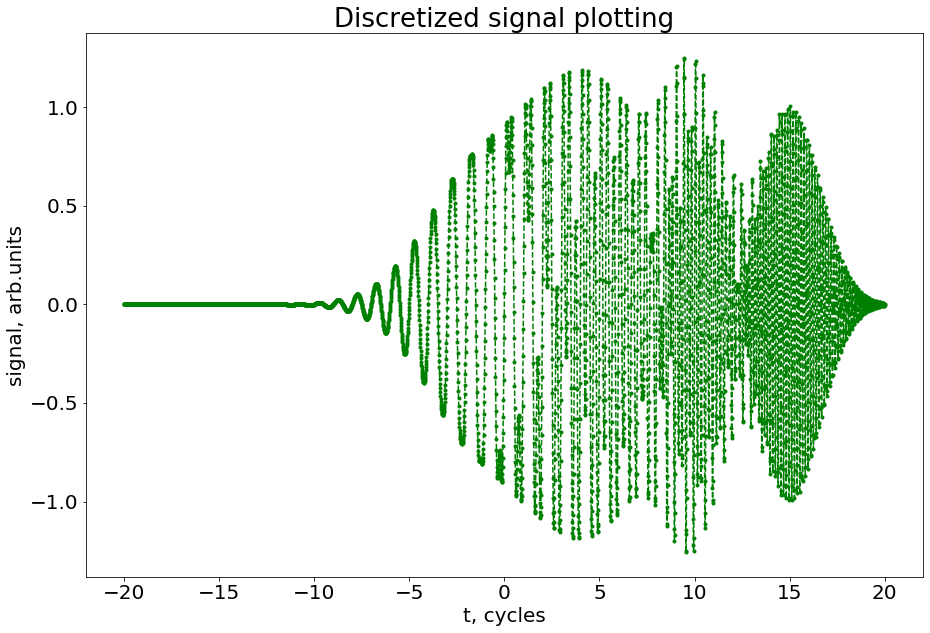

In [12]:
t, y = form_signal()
my_plot(t/ 2 / pi, y, title = "Discretized signal plotting", xlabel = 't, cycles', ylabel = 'signal, arb.units')
plt.show()

## Amplitude-Frequency Power (AFP) characteristic

* <b> AFP </b> provides us with information about <strong>amplitudes </strong> of separated <strong> harmonic </strong> signals (spectral analysis) 
* <b> AFP </b> does <strong>not </strong> give information about the frequency and amplitude depence <strong> on time </strong>.

### Explain, why the "hats" of signal and AFP may be sharp

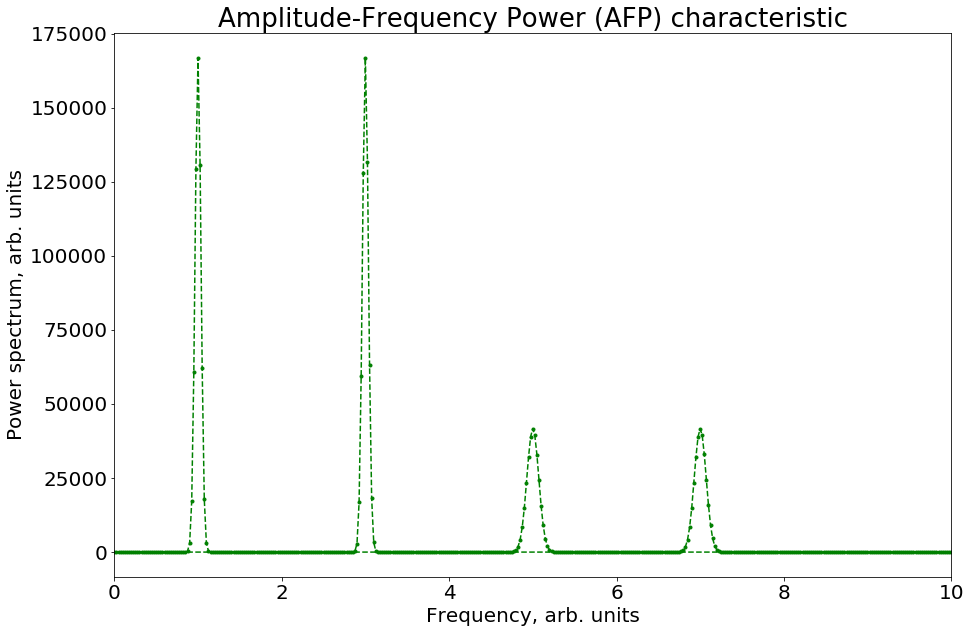

In [14]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
# plot(w, abs(sp)**2)

my_plot(w, abs(sp)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(0, 10)
plt.show()

## Applicate short-time Fourier transform (STFT)
* <b> STFT </b> provides us with information about the frequency and amplitude depence <strong> on time </strong> (specgram).
* vary $\operatorname{kappa} = \overline{0.1, \,10}$, write down results into gif (add in title of picture values of kappa), and explain, why specgram is different.

In [15]:
def window_function(t, window_position, window_width):
    return exp(- (t - window_position) ** 2 / 2 / window_width ** 2)


def get_specgram(window_width, nwindowsteps = 1000):
    t_window_positions=linspace(-20 * 2 * pi, 20 * 2 * pi, nwindowsteps)

    specgram = np.empty([len(t), len(t_window_positions)])

    for i,t_window_position in enumerate(t_window_positions):
        y_window=y * window_function(t, t_window_position, window_width)
        #plot(y_window)
        specgram[:,i]=abs(fft.fft(y_window))

    return specgram


def repeat_function(window_width, nwindowsteps = 1000, repetitions = 100):
    for _ in range(repetitions):
        get_specgram(window_width = window_width, 
                     nwindowsteps = nwindowsteps)
        
def repeat_plot_function(t, w, array, window_width, nwindowsteps = 1000, repetitions = 100):
    for _ in range(repetitions):
        my_second_imshow(t, w, array, 
          title = "Specgram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units")
        
        

def repeat_whole_function(t, y, window_width, nwindowsteps = 1000, repetitions = 100):
    for _ in range(repetitions):
        spec = get_specgram(window_width = window_width, 
                     nwindowsteps = nwindowsteps)
        w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
        my_second_imshow(t, w, spec, 
          title = "Specgram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units")


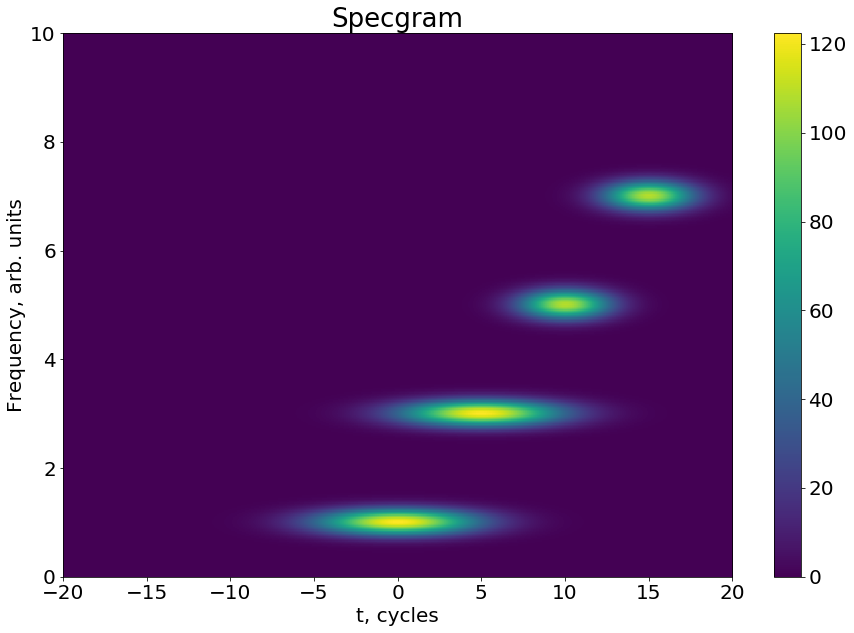

In [16]:
kappa = 1
window_width_given = kappa * 2 * pi
nwindowsteps_given = 1000

my_imshow(t, w, get_specgram(window_width = window_width_given,
                             nwindowsteps = nwindowsteps_given), 
          title = "Specgram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units")
# clim(0,0.5)
plt.ylim(0, 10)
plt.show()

In [19]:
# Animated spectrogram

%matplotlib auto
import matplotlib.animation as animation

array = []
grid_active = False
fig_x_size = 15
fig_y_size = 10
font_param = 20
title = "Specgram"
xlabel = "t, cycles" 
ylabel = "Frequency, arb. units"
# TA Yuri told us to look at case when we have kappa 100 times smaller - we have different spectrogram
for kappa in [(i+1)/1000 for i in range(200)]:
#for kappa in [(i+1)/10 for i in range(100)]:
    window_width_given = kappa * 2 * pi
    nwindowsteps_given = 1000
    array.append(get_specgram(window_width = window_width_given,nwindowsteps = nwindowsteps_given))
    
    
    #ims.append(im)
# clim(0,0.5)
#plt.show()


Using matplotlib backend: Qt5Agg


In [21]:
fig = plt.figure(figsize = (fig_x_size,fig_y_size))    

im=plt.imshow(array[1], aspect='auto', 
               origin='lower', 
               extent=[min(t)/2/pi, max(t)/2/pi, w[0], 2 * w[int(len(t)/2)-1]])

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=font_param)
plt.title(title, fontsize = font_param * 1.3)
plt.xlabel(xlabel, fontsize = font_param)
plt.ylabel(ylabel, fontsize = font_param)
plt.xticks(fontsize = font_param)
plt.yticks(fontsize = font_param)
plt.grid(grid_active)
plt.ylim(0, 10)

def animate(i): # Animation 
    im.set_data(array[i]) 


ani = animation.FuncAnimation(fig, animate, len(array))
plt.show()

Spectrogram changes because of changing of window width - we changing the "cut" area in time-frequency domain and basically consider less frequencies.

## cProfile the code

* Vary $\operatorname{n\_timestamps\_given} = \overline{4090, \, 5000}$, write down results in this markdown and explain why cProfiler gives different results. What is bottleneck in this program? How can you improve the program?

In [12]:
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100

n_timestamps_given = 4096

t, y = form_signal(n_timestamps = n_timestamps_given)

In [17]:
# I tried to get information from cprofiler
import pstats, pprint 
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100
t, y = form_signal(n_timestamps = n_timestamps_given)

profiler = cProfile.Profile()

print("n_timestamps_given = ",n_timestamps_given)
profiler.run('repeat_function(   window_width = ' + str(window_width_given) + ',' +
                                'nwindowsteps = ' + str(nwindowsteps_given) + ',' +
                                'repetitions  = ' + str(repetitions_given ) +       ')' )
pprint.pprint(profiler.getstats())

n_timestamps_given =  4096
[_lsprof.profiler_entry(code='<built-in method _operator.index>', callcount=100, reccallcount=0, totaltime=3.4e-05, inlinetime=3.4e-05, calls=None),
 _lsprof.profiler_entry(code='<built-in method builtins.abs>', callcount=100000, reccallcount=0, totaltime=3.855143, inlinetime=3.855143, calls=None),
 _lsprof.profiler_entry(code='<built-in method builtins.exec>', callcount=1, reccallcount=0, totaltime=12.251524, inlinetime=0.000127, calls=[_lsprof.profiler_subentry(code=<code object <module> at 0x7ff7505e9420, file "<string>", line 1>, callcount=1, reccallcount=0, totaltime=12.251396999999999, inlinetime=6e-06)]),
 _lsprof.profiler_entry(code='<built-in method builtins.getattr>', callcount=100, reccallcount=0, totaltime=5.4e-05, inlinetime=5.4e-05, calls=None),
 _lsprof.profiler_entry(code='<built-in method builtins.hasattr>', callcount=100000, reccallcount=0, totaltime=0.02044, inlinetime=0.02044, calls=None),
 _lsprof.profiler_entry(code='<built-in method bui

In [ ]:
# Kind of success, but it is still hard for me to extract nessesary information (I don't use files)
pprint.pprint(profiler.getstats()[1])

In [ ]:
# Professor Rykovanov asked to look at situation with n_timestamps_given = 3^9 first

n_timestamps_given = 3**9
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100
t, y = form_signal(n_timestamps = n_timestamps_given)



print("n_timestamps_given = ",n_timestamps_given)
cProfile.run('repeat_function(   window_width = ' + str(window_width_given) + ',' +
                                'nwindowsteps = ' + str(nwindowsteps_given) + ',' +
                                'repetitions  = ' + str(repetitions_given ) +       ')' )


In [ ]:
# I then compare with 3^9+6 - twice longer, I will elaborate on this point later 

n_timestamps_given = 3**9+6
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100
t, y = form_signal(n_timestamps = n_timestamps_given)



print("n_timestamps_given = ",n_timestamps_given)
cProfile.run('repeat_function(   window_width = ' + str(window_width_given) + ',' +
                                'nwindowsteps = ' + str(nwindowsteps_given) + ',' +
                                'repetitions  = ' + str(repetitions_given ) +       ')' )


In [58]:
# First try using time-library to plot the dependencies of such cases
from time import time
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100
Time_array = []
n_array = [i+3**9-4 for i in range(15)]


for n_timestamps_given in n_array:
    start_time = time()
    t, y = form_signal(n_timestamps = n_timestamps_given)
    #print("n_timestamps_given = ",n_timestamps_given)
    repeat_function(t, window_width = window_width_given, nwindowsteps = nwindowsteps_given, repetitions  = repetitions_given)
    Time_array.append(time() - start_time)

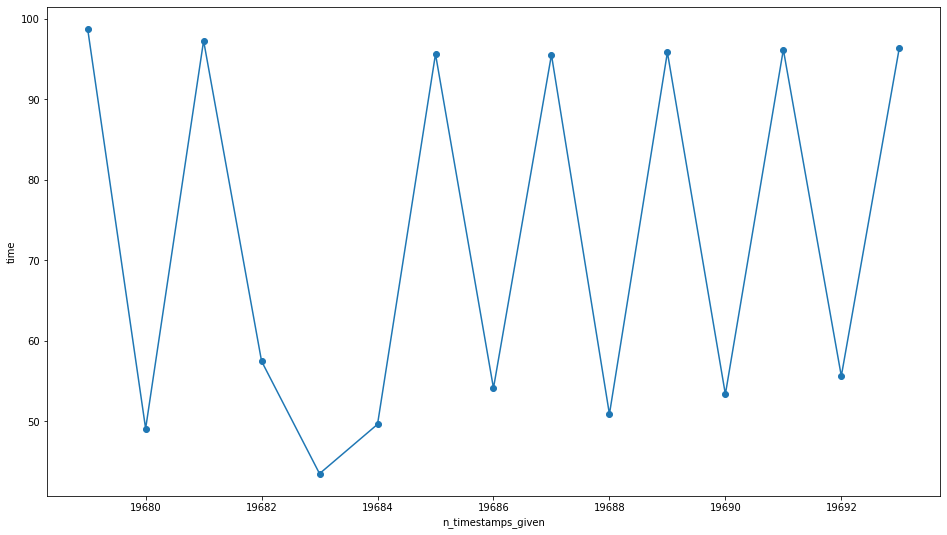

In [59]:
# It takes soooo long to actually do all computations, so I decided to do it at least once and to save the picture
fig = plt.figure(figsize = (16,9))
plt.xlabel('n_timestamps_given')
plt.ylabel('time')
plt.plot(n_array, Time_array, '.-', markersize=12)
plt.savefig('figure.png')

<img src="figure.png">

## Elaboration part
As we can see, we have kind of "minimum" on this graph and also some oscillations. <br>
First, most interesting part can be explained relatively easy - if we use number of data points equal to $ a^n $ (in our case $ 3^9 $), we should perform better (simplification of computation of DFT, but it is only my assumption) <br>
Similar idea used here (maybe not so useful, but I did not find much information bout it): <br>
https://nptel.ac.in/content/storage2/nptel_data3/html/mhrd/ict/text/112105048/lec11.pdf <br>
Secondly, oscillations occur because of discrete nature of an algorithm. It based on principle "Divide and conquer" (sor of a binary tree based algorithm), so with even n_timestamps_given it will perform better in terms of time. Useful links: <br>
1) https://medium.com/@micah.shute/divide-and-conquer-the-fast-fourier-transform-f61cb060710b <br>
2) http://www.csc.kth.se/utbildning/kth/kurser/DD2352/algokomp12/Forelasningar/F4.pdf <br>
3) https://engineering.purdue.edu/~ee538/TextDivideConquer.pdf (part of a book)

## cProfile parts of code
### * Wrap the following markdowns as $\mathbf{def}\:\:\: \mathit{plot\_specgram(\dots)}\:\:\: \:\:\: $ and as $\:\:\: \:\:\: \mathbf{def}\:\:\: \mathit{compute\_specgram(\dots)}$: ![Image_1.png](Image_1.png) 
![Image_3.png](Image_3.png)

### * Use, for example, $\mathit{time()}$ for your own profiling, by using, e.g., $\mathit{from\: time\: import\: time}$.
### * Vary $\operatorname{n\_timestamps\_given}$ and (by using, e.g., $\mathit{time()}$) calulate computational time expended on $\mathit{plot\_specgram(\dots)}$ ($=t_{plot}(n\_timestamps\_given)$) and $\mathit{compute\_specgram(\dots)}$ ($=t_{compute}(n\_timestamps\_given)$) and ratios $\frac{t_{plot}(n\_timestamps\_given)}{t_{total}(n\_timestamps\_given)}$ $\frac{t_{compute}(n\_timestamps\_given)}{t_{total}(n\_timestamps\_given)}$, where $t_{total}(n\_timestamps\_given)$ is total computational time of program in for each $n\_timestamps\_given$
### * Plot the graphs of the ratios versus $\mathit{n\_timestamps\_given}$, label axises and title.

In [86]:
def compute_specgram(n_array, window_width_given = 1 * 2 * pi, nwindowsteps_given = 100, repetitions_given = 10):
    Time_array = np.empty(0)
    for n_timestamps_given in n_array:
        start_time = time()       
        t, y = form_signal(n_timestamps = n_timestamps_given)        
        repeat_function(window_width = window_width_given, nwindowsteps = nwindowsteps_given, repetitions  = repetitions_given)
        Time_array = np.append(Time_array,time() - start_time)
    return Time_array

def plot_specgram(n_array, window_width_given = 1 * 2 * pi, nwindowsteps_given = 100, repetitions_given = 10):
    Time_array = np.empty(0)
    for n_timestamps_given in n_array:
        start_time = time()
        t, y = form_signal(n_timestamps = n_timestamps_given)
        w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
        spec = get_specgram(window_width = window_width_given, nwindowsteps = nwindowsteps_given)

        repeat_plot_function(t, w, array = spec, window_width = window_width_given, nwindowsteps = nwindowsteps_given, repetitions  = repetitions_given)
        Time_array = np.append(Time_array,time() - start_time)
    return Time_array

def whole_program(n_array, window_width_given = 1 * 2 * pi, nwindowsteps_given = 100, repetitions_given = 10):
    Time_array = np.empty(0)
    for n_timestamps_given in n_array:
        start_time = time()
        t, y = form_signal(n_timestamps = n_timestamps_given)
        repeat_whole_function(t, y, window_width = window_width_given, nwindowsteps = nwindowsteps_given, repetitions  = repetitions_given)
        Time_array = np.append(Time_array,time() - start_time)
    return Time_array

In [87]:
from time import time
%matplotlib inline
Range = 12
Start = 4090

n_array = [i+Start for i in range(Range+1)] # number of timestamps
Compute_time = compute_specgram(n_array)
plot_time = plot_specgram(n_array)
Whole_time = whole_program(n_array)

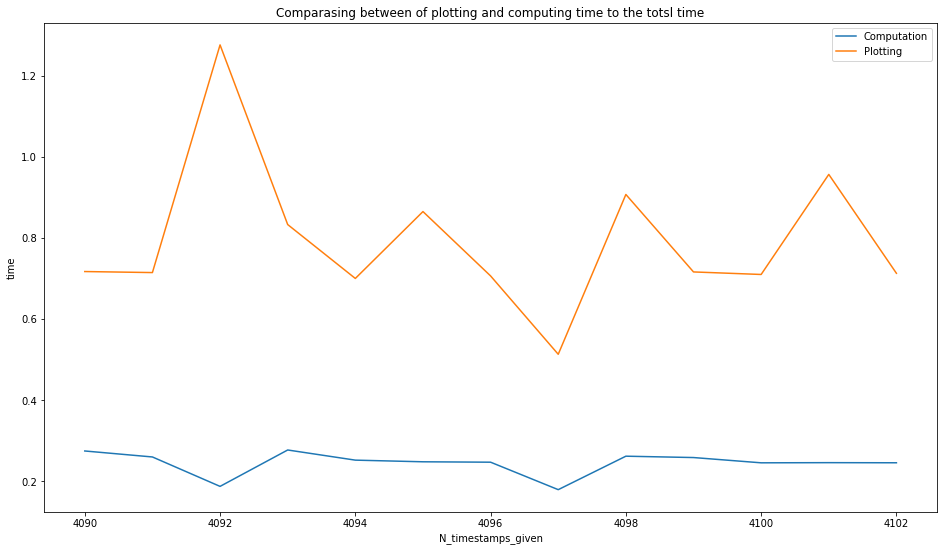

In [88]:
fin_1 = np.zeros(Range+1)
fin_2 = np.zeros(Range+1)
for i in range(Range+1): 
    fin_1[i] = Compute_time[i]/Whole_time[i]
    fin_2[i] = plot_time[i]/Whole_time[i]

fig = plt.figure(figsize = (16,9))    
plt.plot(n_array, fin_1, label = 'Computation')
plt.plot(n_array, fin_2, label = 'Plotting')
plt.title('Comparasing between of plotting and computing time to the totsl time')
plt.legend(loc='best')
plt.xlabel('N_timestamps_given')
plt.ylabel('time')
plt.show()

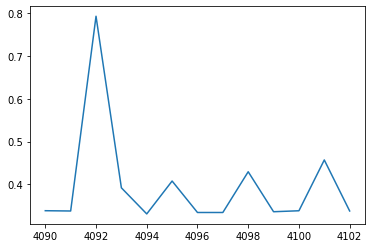

In [89]:
plt.plot(n_array, plot_time)

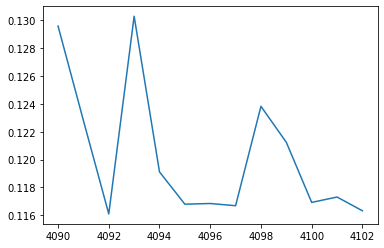

In [90]:
plt.plot(n_array, Compute_time)

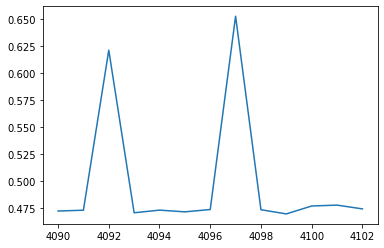

In [91]:
plt.plot(n_array, Whole_time)